In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
import timesfm
import seaborn

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)].


In [3]:
from cleaning0 import *
from structures import *

In [4]:
df = pd.read_csv('Train_timeseries.csv', index_col=0, parse_dates=True)

In [6]:
df.isna().sum()

Series1    46089
Series2    45533
Series3    45938
Series4    45867
Series5    45530
Series6    45613
dtype: int64

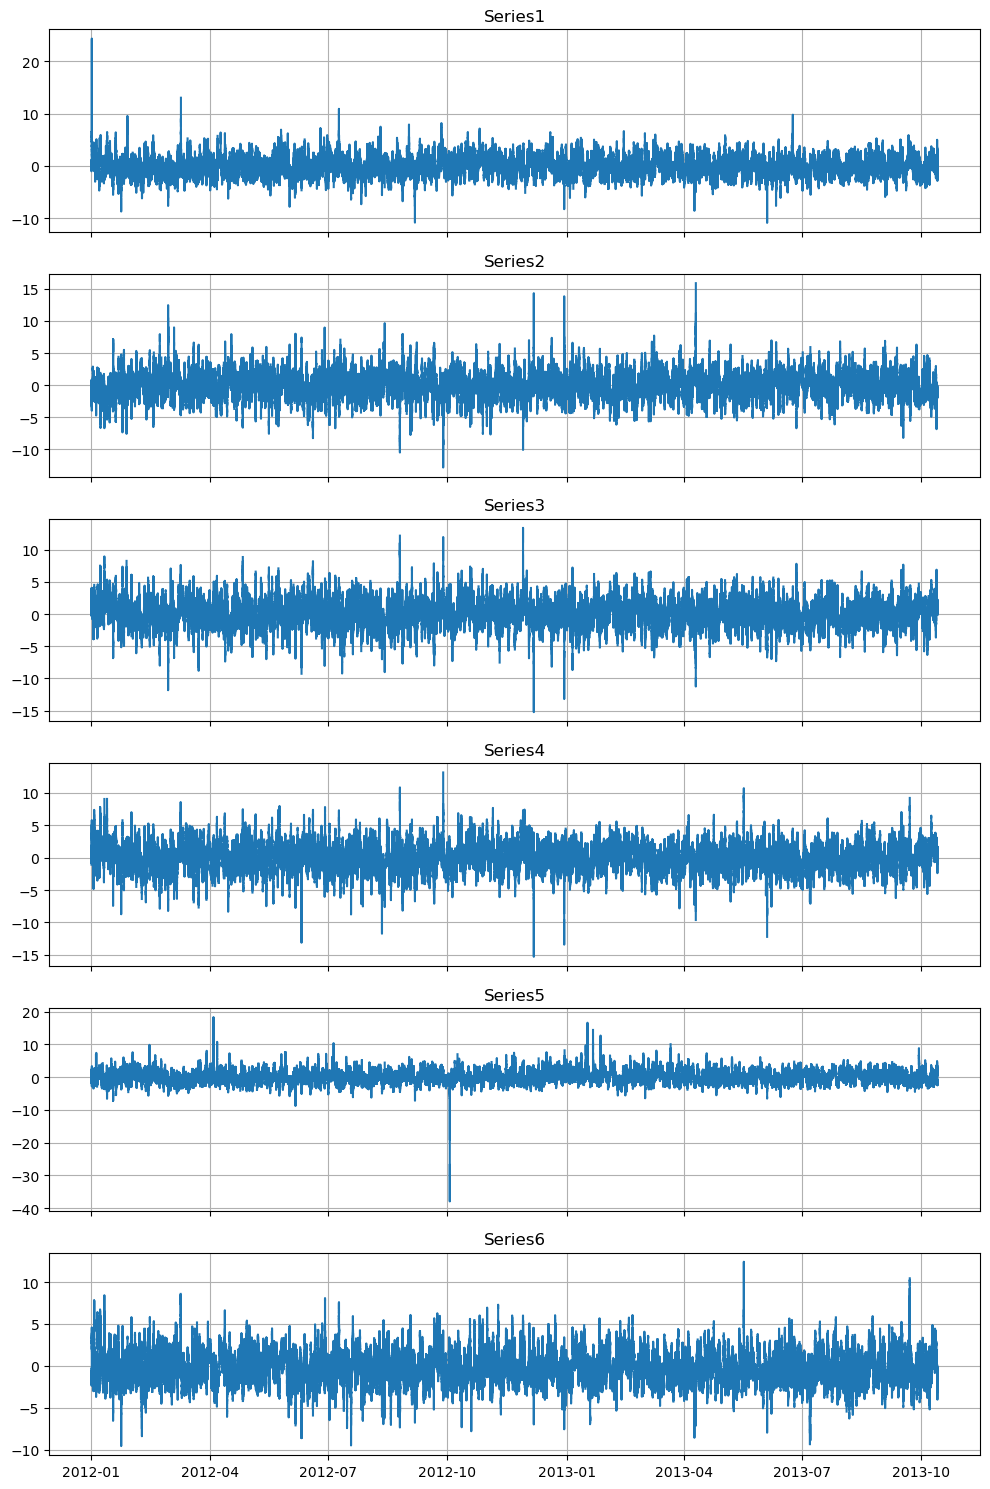

In [7]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)

# Проходимося по всіх колонках і осях
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column])
    axes[i].set_title(column)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [9]:
cleaner = Pipeline([('iqr', IQRTransformer(strategy='nan'))])

In [10]:
df = TSdata(data=df, targets = ['Series1', 'Series2', 'Series3', 'Series4', 'Series5'])

In [11]:
df1 = cleaner.fit_transform(df)

Calculated IQR boundaries: {'Series1': {'lower': np.float64(-4.356249633272942), 'upper': np.float64(4.175611517082414), 'Q1': np.float64(-1.1568017018896835), 'Q3': np.float64(0.9761635856991556), 'IQR': np.float64(2.132965287588839)}, 'Series2': {'lower': np.float64(-4.122220845017623), 'upper': np.float64(4.033133507771018), 'Q1': np.float64(-1.0639629627218827), 'Q3': np.float64(0.974875625475278), 'IQR': np.float64(2.0388385881971605)}, 'Series3': {'lower': np.float64(-3.926191530059506), 'upper': np.float64(4.065708772630649), 'Q1': np.float64(-0.9292289165506976), 'Q3': np.float64(1.0687461591218412), 'IQR': np.float64(1.9979750756725387)}, 'Series4': {'lower': np.float64(-4.049589766777941), 'upper': np.float64(4.128807176501788), 'Q1': np.float64(-0.9826909130480423), 'Q3': np.float64(1.06190832277189), 'IQR': np.float64(2.0445992358199323)}, 'Series5': {'lower': np.float64(-4.167137748758104), 'upper': np.float64(4.002699001846424), 'Q1': np.float64(-1.1034489672814058), 'Q3'

In [12]:
print(df1.data.isna().sum())

Series1    49383
Series2    52544
Series3    55935
Series4    53642
Series5    49686
Series6    45613
dtype: int64


In [13]:
df_int = df1.data.interpolate(method='polynomial', order=3)

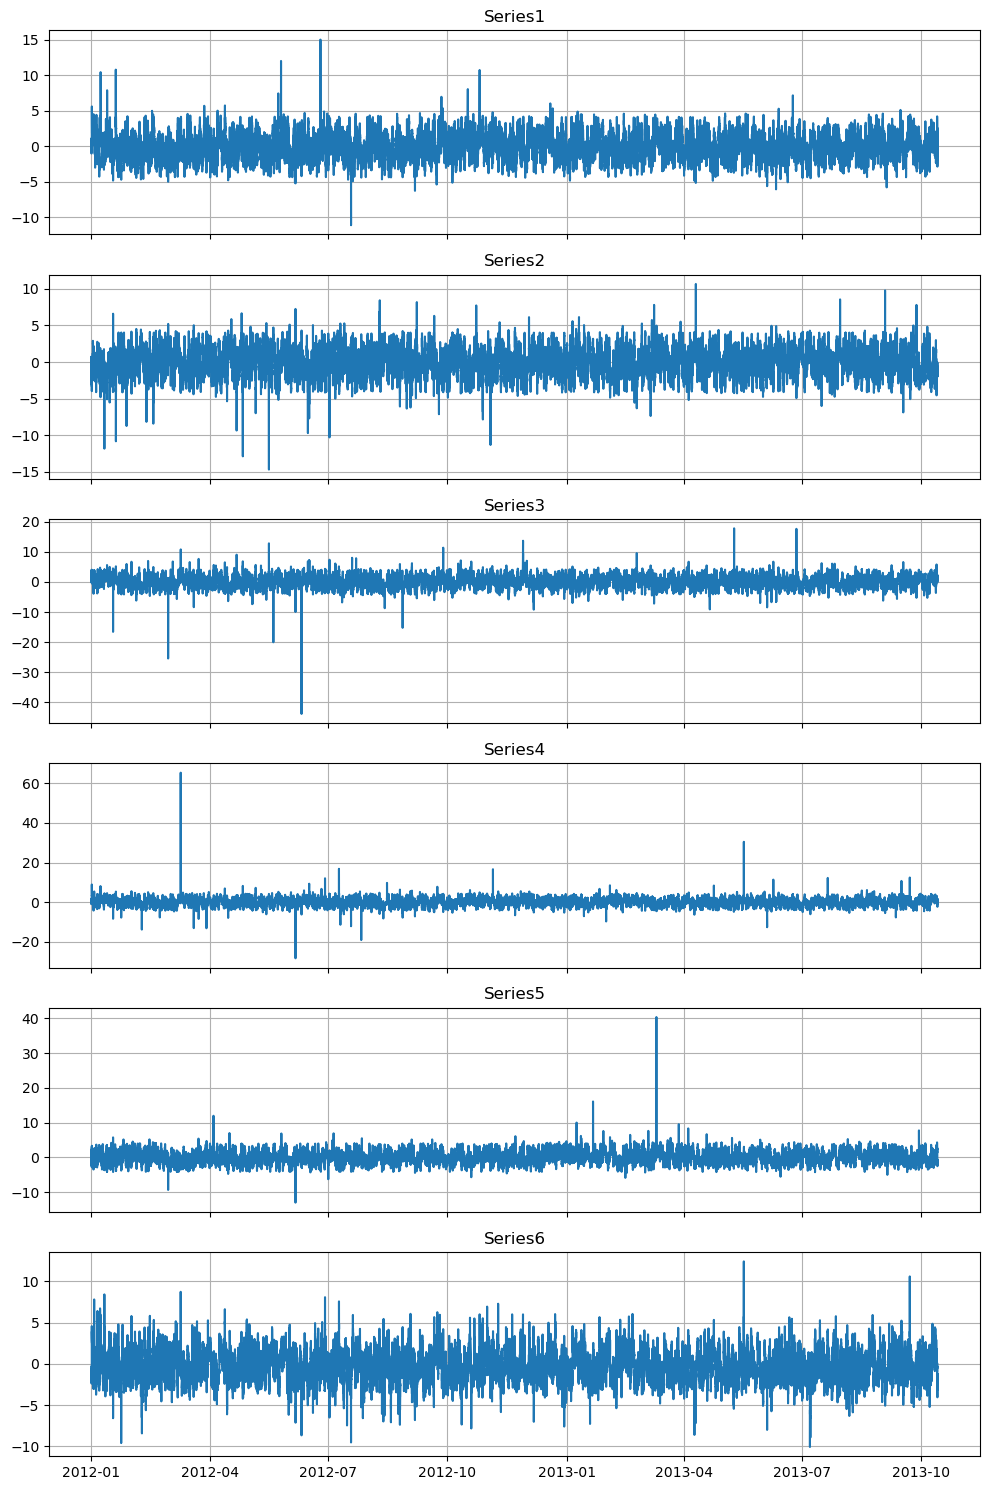

In [14]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)

# Проходимося по всіх колонках і осях
for i, column in enumerate(df_int.columns):
    axes[i].plot(df_int.index, df_int[column])
    axes[i].set_title(column)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

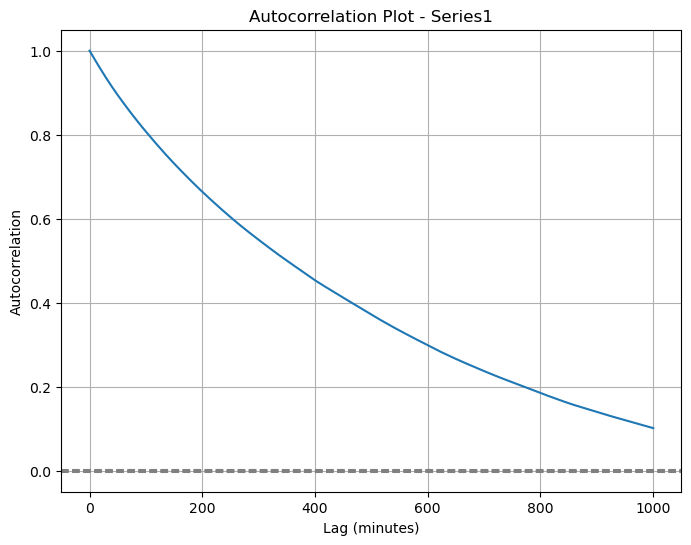

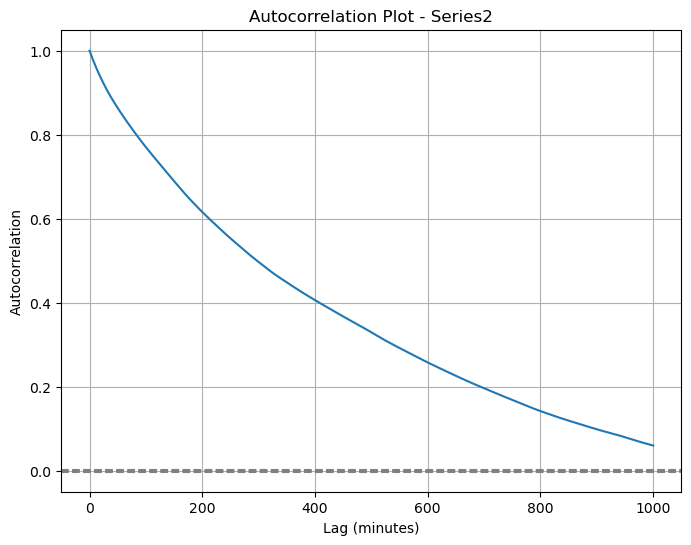

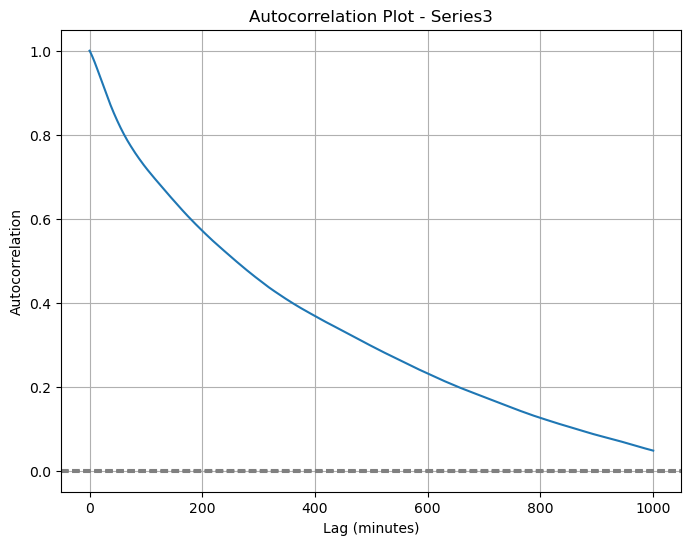

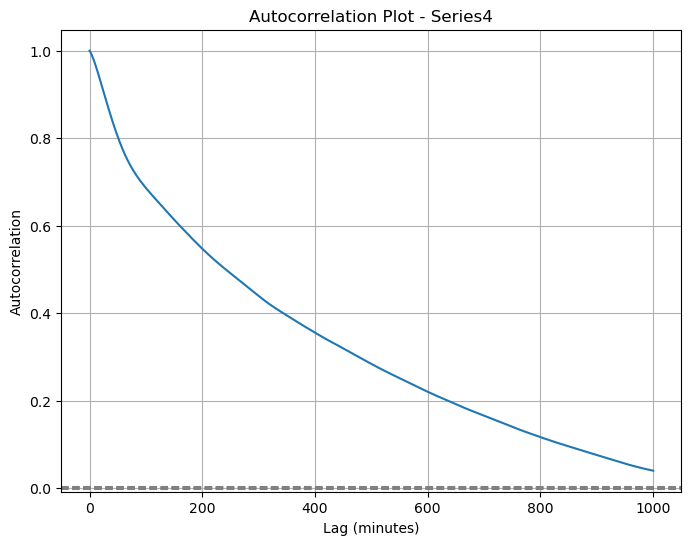

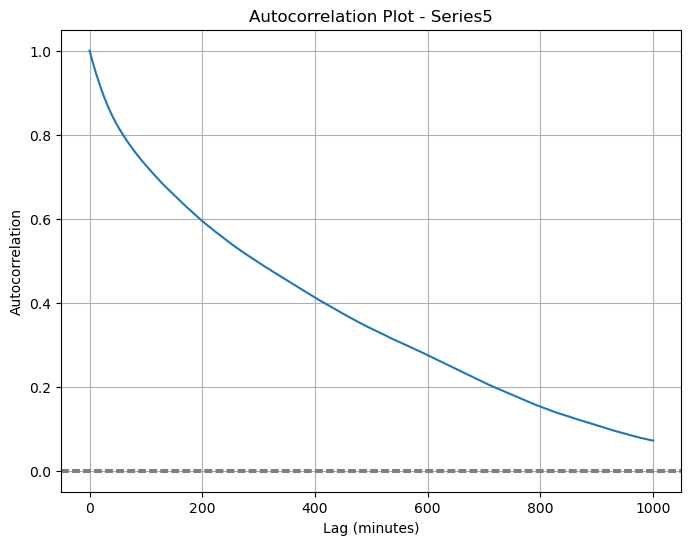

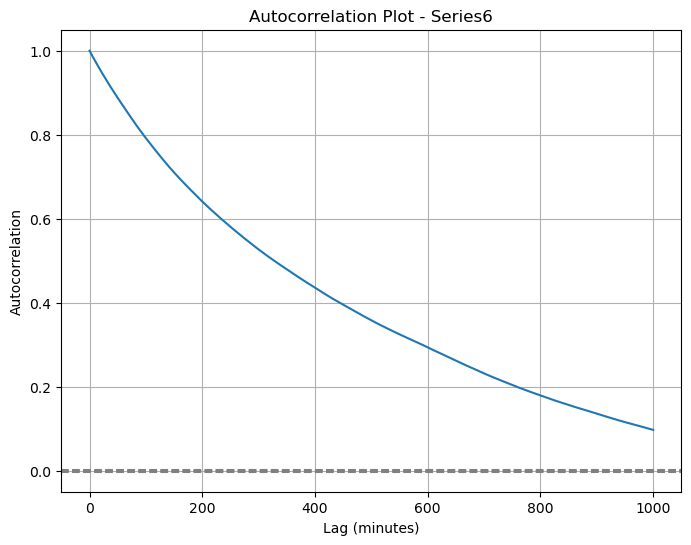

In [21]:
# Кількість лагів, які ти хочеш бачити (наприклад, 1000)
max_lag = 1000

for column in df_int.columns:
    series = df_int[column].dropna().values  # беремо весь ряд без обрізання

    # Обчислюємо автокореляцію
    acf_values = acf(series, nlags=max_lag, fft=True)

    # Створюємо графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(acf_values)), acf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Autocorrelation Plot - {column}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Autocorrelation")
    plt.grid(True)
    plt.show()

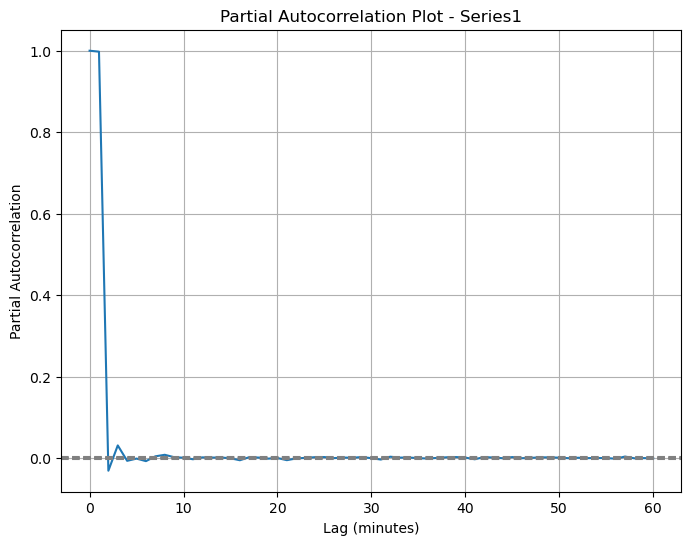

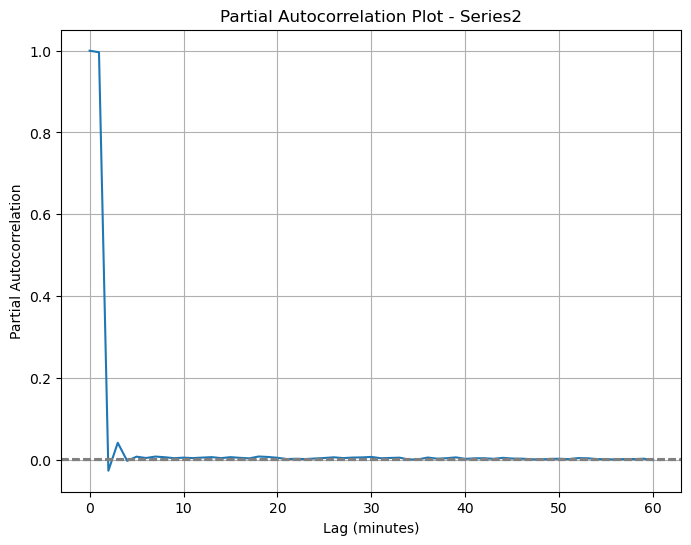

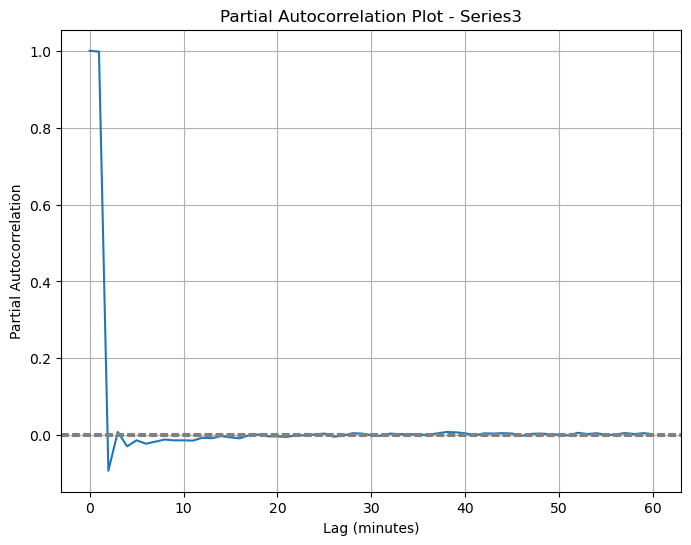

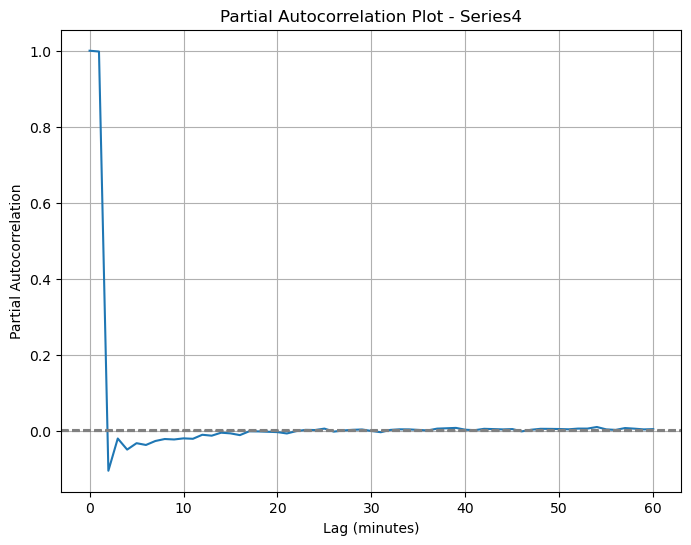

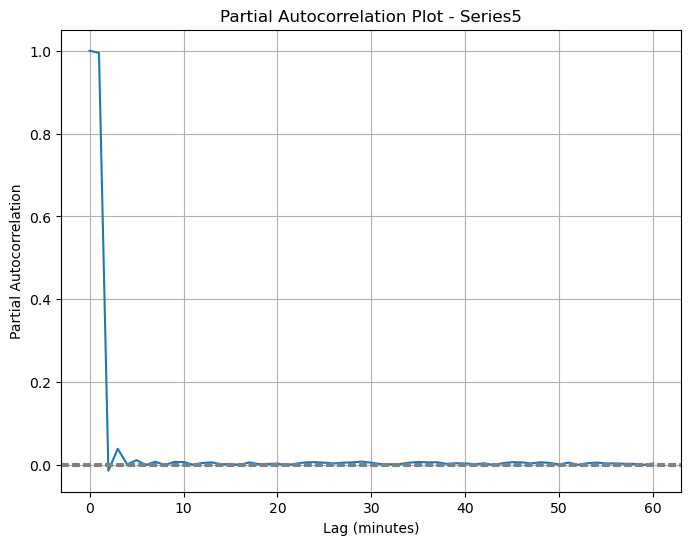

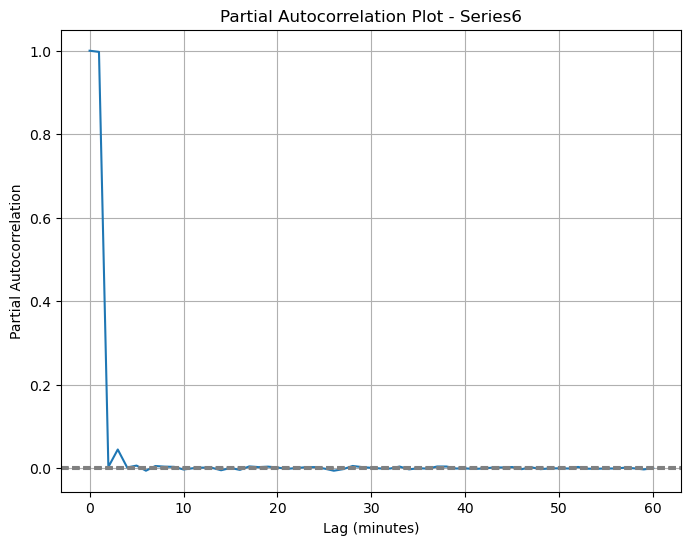

In [28]:
# ld
# ldb
# ywm

for column in df_int.columns:
    series = df_int[column].dropna().values  # беремо весь ряд без обрізання

    # Обчислюємо часткову автокореляцію
    pacf_values = pacf(series, nlags=60, method='ywm')

    # Створюємо графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(pacf_values)), pacf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Partial Autocorrelation Plot - {column}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Partial Autocorrelation")
    plt.grid(True)
    plt.show()

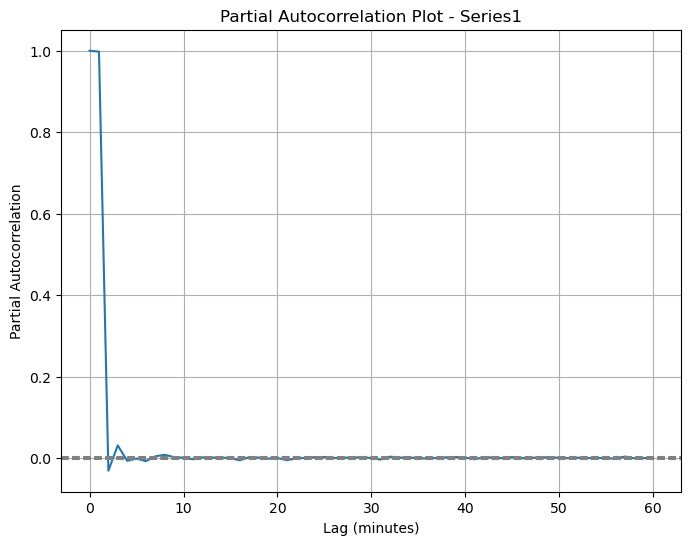

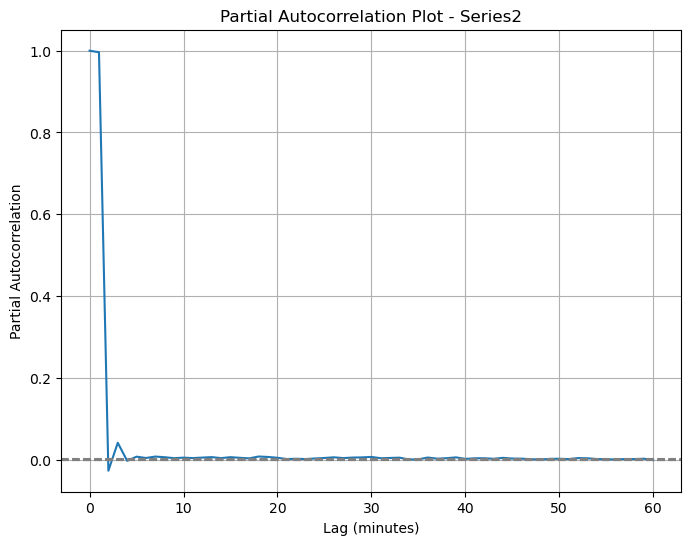

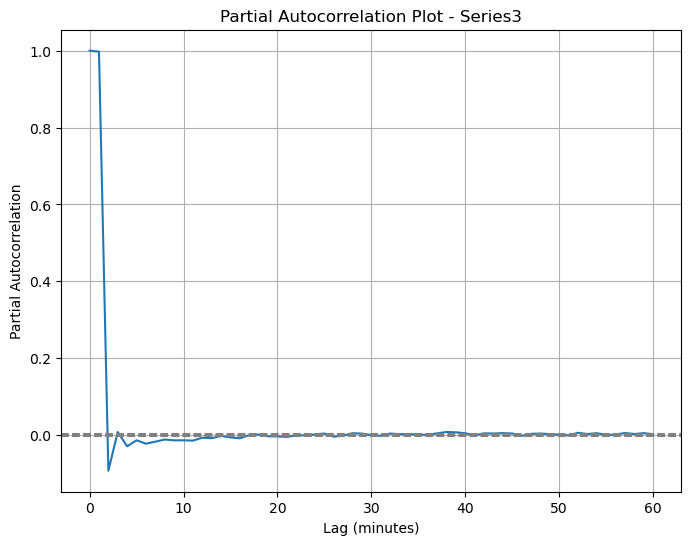

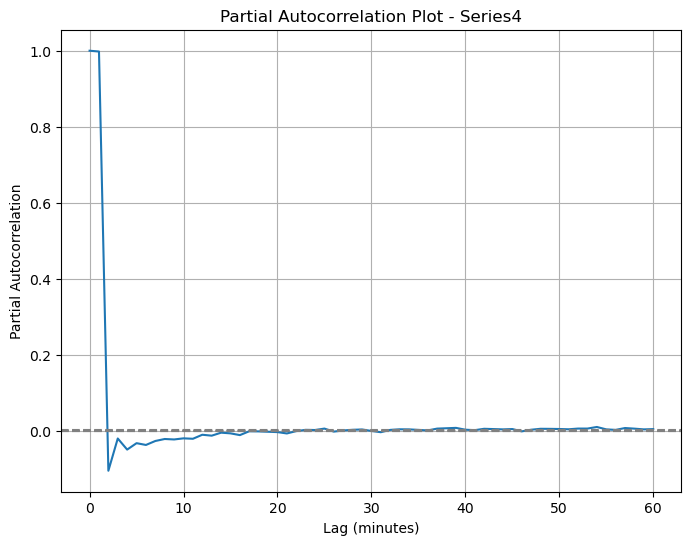

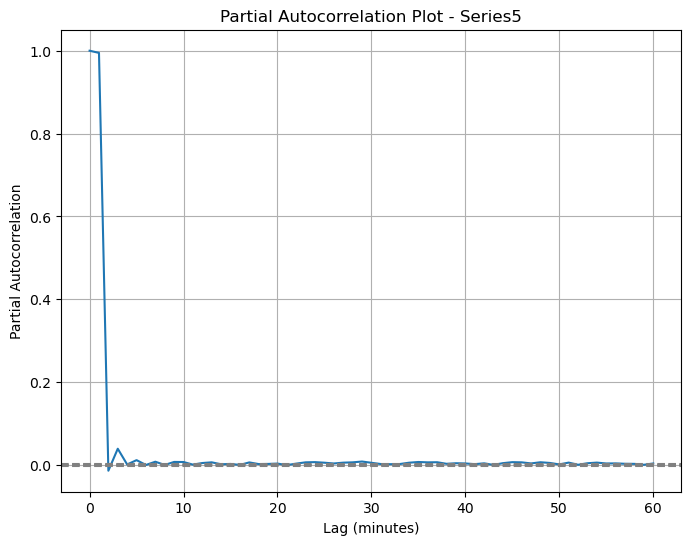

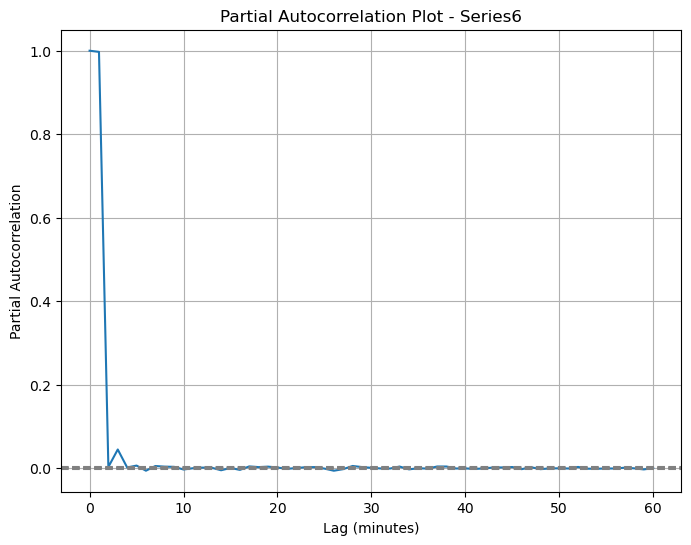

In [29]:
for column in df_int.columns:
    series = df_int[column].dropna().values  # беремо весь ряд без обрізання

    # Обчислюємо часткову автокореляцію
    pacf_values = pacf(series, nlags=60, method='ld')

    # Створюємо графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(pacf_values)), pacf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Partial Autocorrelation Plot - {column}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Partial Autocorrelation")
    plt.grid(True)
    plt.show()

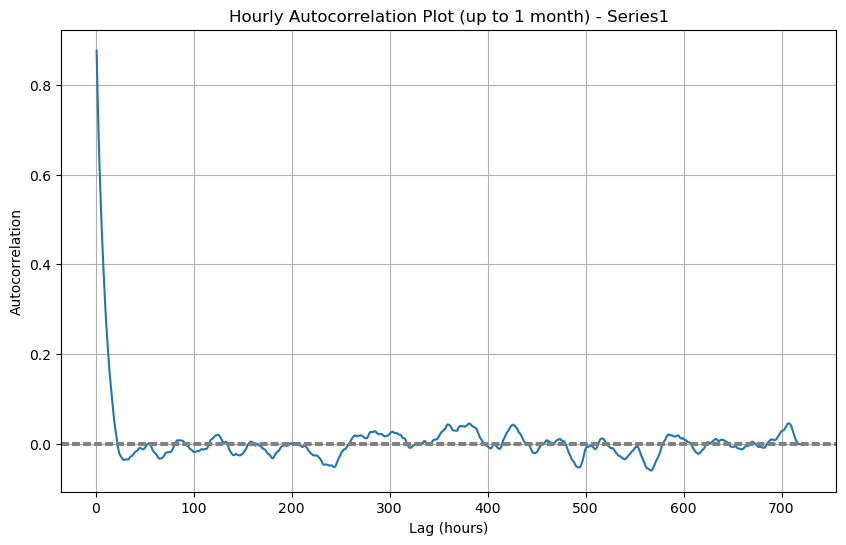

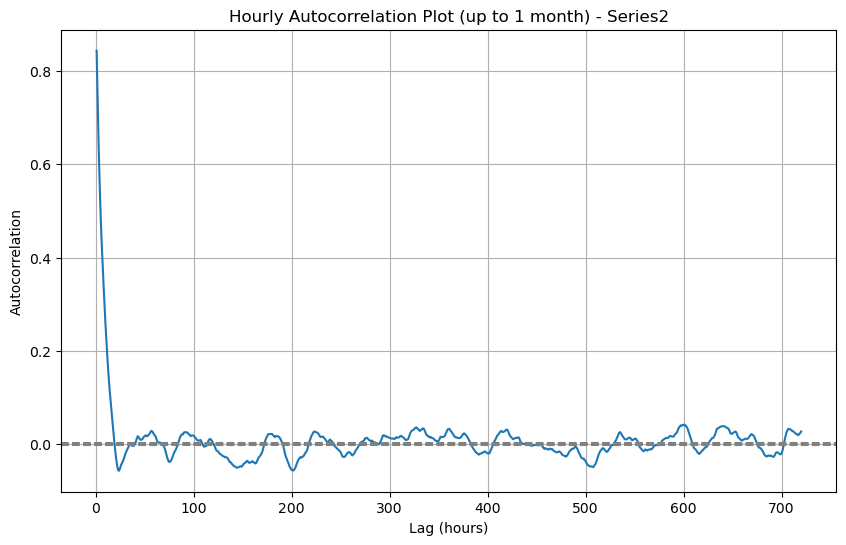

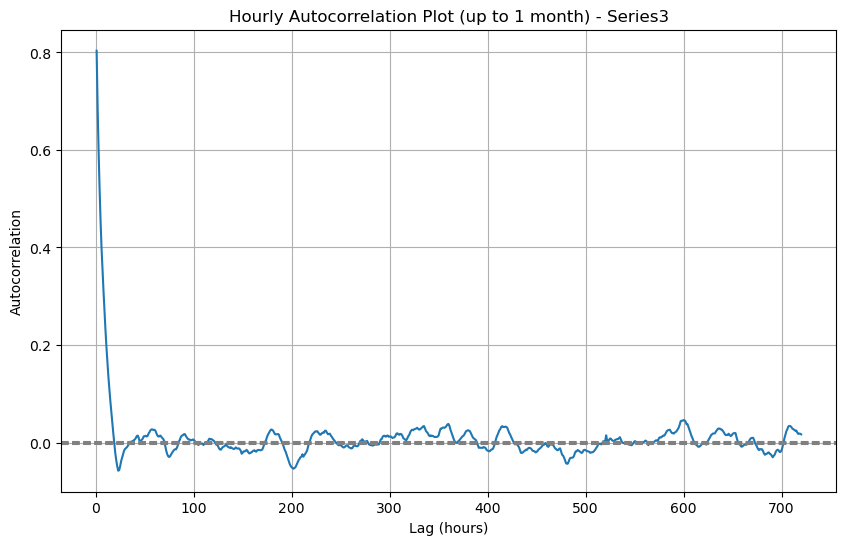

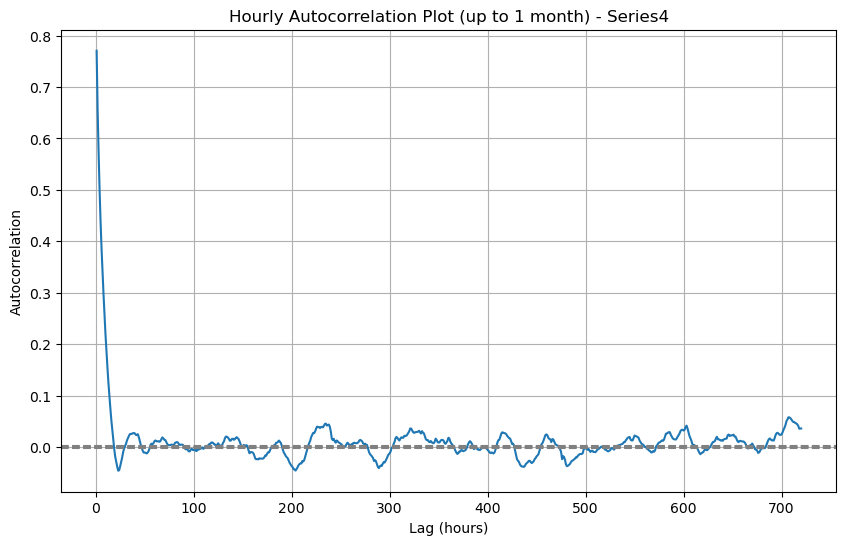

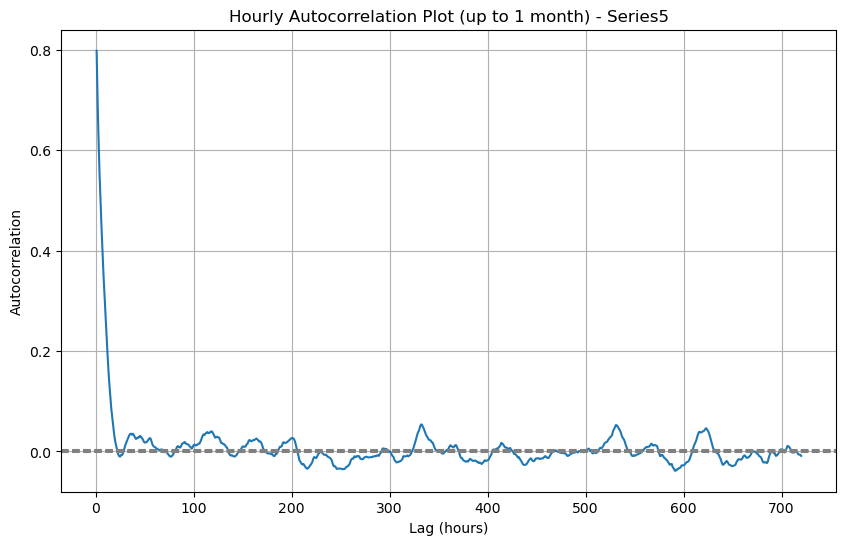

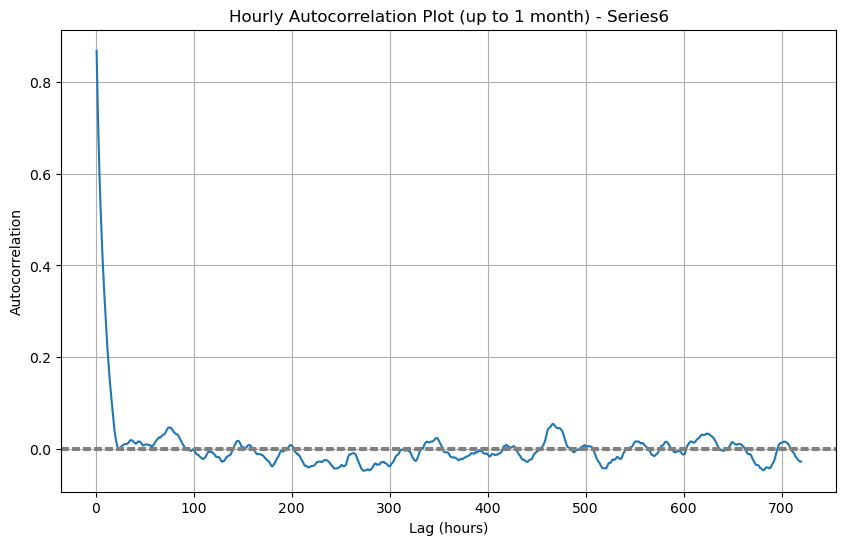

In [23]:
# Макс. кількість годин (1 місяць = 30 днів * 24 годин)
max_hours = 24 * 30

# Рядок для лагів у хвилинах
lags_in_minutes = np.arange(1, max_hours + 1) * 60  # кожна година = 60 хв

for column in df_int.columns:
    series = df_int[column].dropna().values

    # Щоб уникнути проблем, беремо увесь ряд
    autocorr_values = []
    for lag in lags_in_minutes:
        if lag < len(series):
            corr = np.corrcoef(series[:-lag], series[lag:])[0,1]
            autocorr_values.append(corr)
        else:
            autocorr_values.append(np.nan)

    # Малюємо
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, max_hours + 1), autocorr_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Hourly Autocorrelation Plot (up to 1 month) - {column}")
    plt.xlabel("Lag (hours)")
    plt.ylabel("Autocorrelation")
    plt.grid(True)
    plt.show()

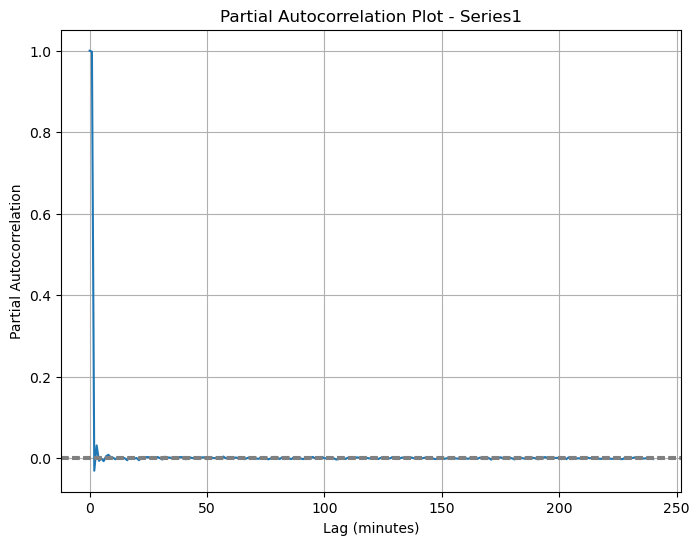

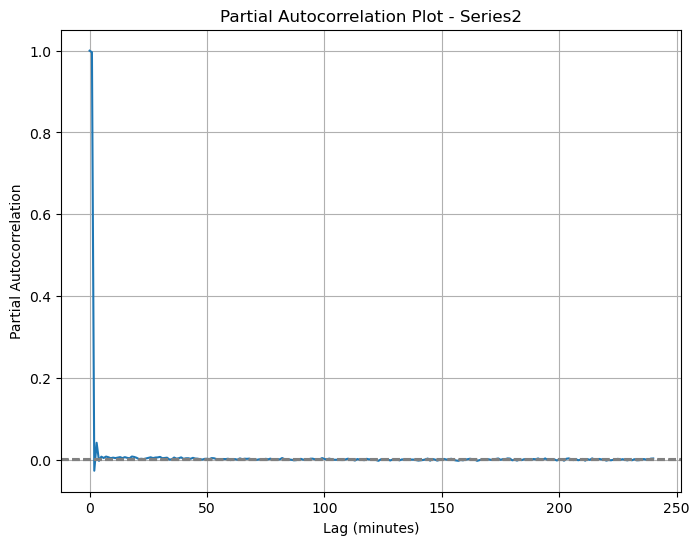

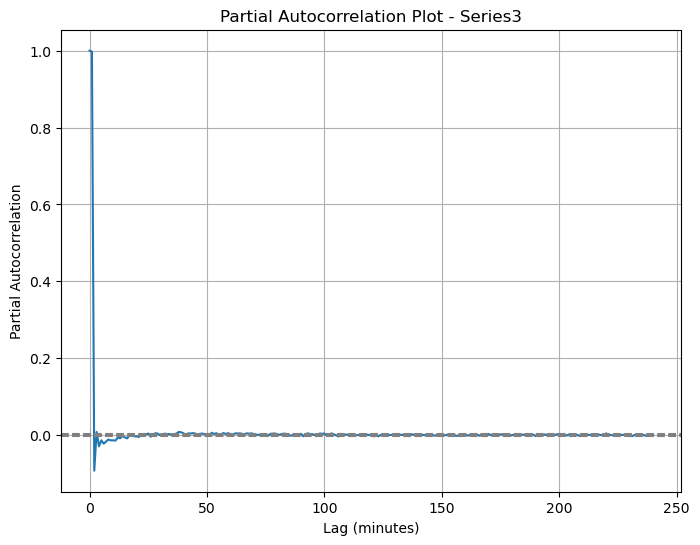

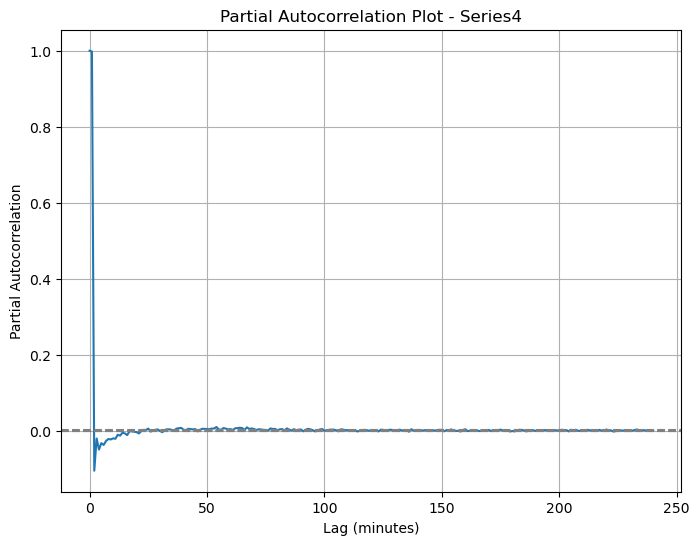

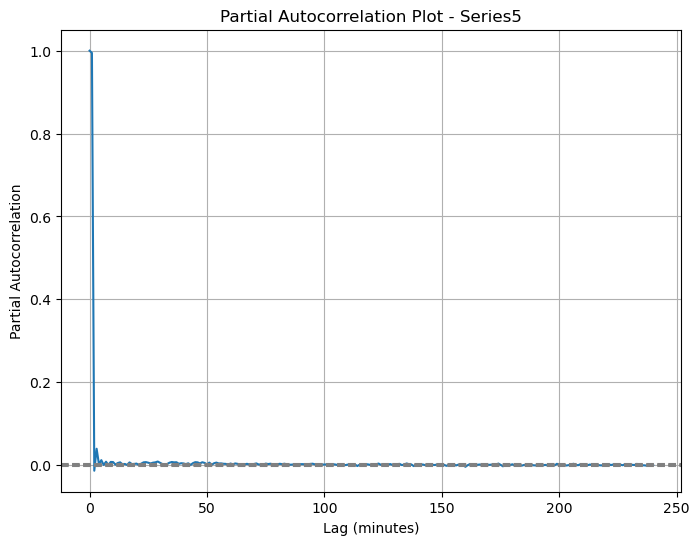

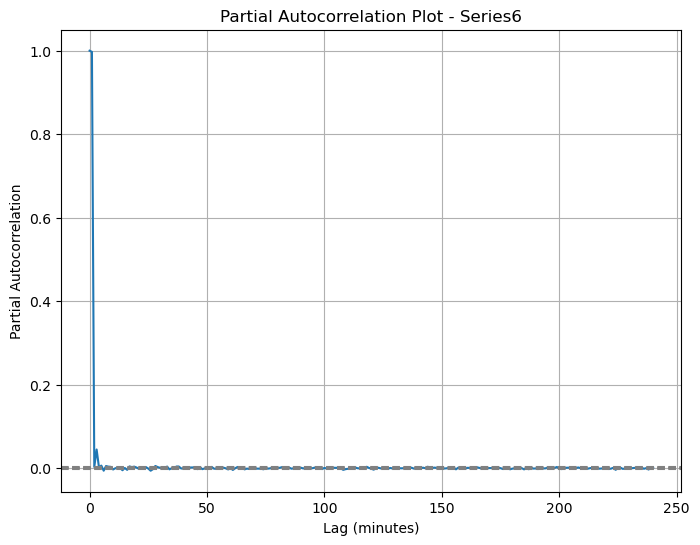

In [32]:
for column in df_int.columns:
    series = df_int[column].dropna().values  # беремо весь ряд без обрізання

    # Обчислюємо часткову автокореляцію
    pacf_values = pacf(series, nlags=240, method='yw')

    # Створюємо графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(pacf_values)), pacf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(series) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Partial Autocorrelation Plot - {column}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Partial Autocorrelation")
    plt.grid(True)
    plt.show()

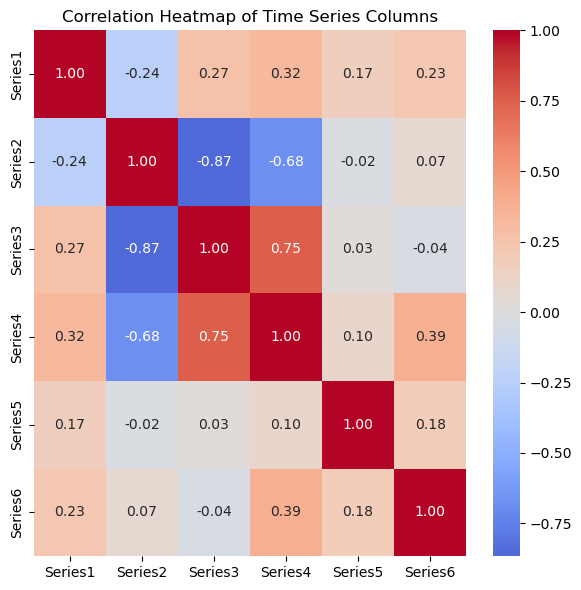

In [14]:
# Calculate correlation matrix
correlation_matrix = df_int.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Time Series Columns")
plt.tight_layout()
plt.show()

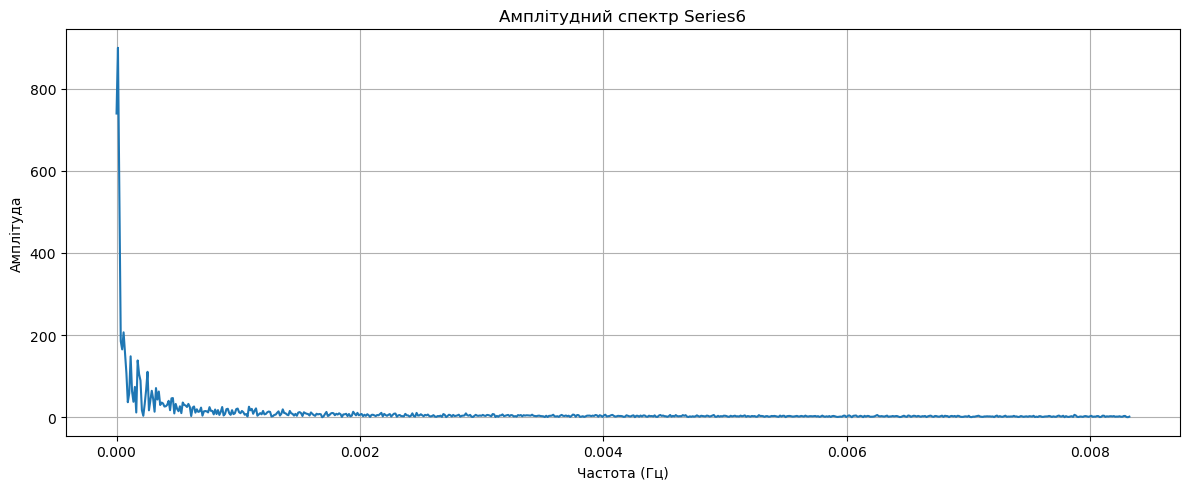

Топ-5 частот за амплітудою:
Частота: 0.00001157 Гц -> Період: 1440.00 хв -> Амплітуда: 899.17
Частота: 0.00000000 Гц -> Період: inf хв -> Амплітуда: 739.28
Частота: 0.00002315 Гц -> Період: 720.00 хв -> Амплітуда: 554.87
Частота: 0.00005787 Гц -> Період: 288.00 хв -> Амплітуда: 206.76
Частота: 0.00003472 Гц -> Період: 480.00 хв -> Амплітуда: 185.20


In [14]:
# Останні 24 години
N = 1440
dT = 60  # крок 1 хвилина = 60 секунд

name = 'Series6'

signal = df_int[name].iloc[-N:].values

# FFT
fft_coeffs = np.fft.fft(signal)
amplitudes = np.abs(fft_coeffs)
freqs = np.fft.fftfreq(N, d=dT)

# Тільки перша половина (позитивні частоти)
half_N = N // 2
freqs = freqs[:half_N]
amplitudes = amplitudes[:half_N]

# Графік
plt.figure(figsize=(12, 5))
plt.plot(freqs, amplitudes)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплітуда')
plt.title(f'Амплітудний спектр {name}')
plt.grid(True)
plt.tight_layout()
plt.show()

# Знаходимо найбільші амплітуди
top_indices = np.argsort(amplitudes)[-5:]  # топ-5 найбільших

print("Топ-5 частот за амплітудою:")
for idx in reversed(top_indices):  # щоб друкувати від найбільшої амплітуди до найменшої
    freq = freqs[idx]
    amp = amplitudes[idx]
    period_sec = 1 / freq
    period_min = period_sec / 60
    print(f"Частота: {freq:.8f} Гц -> Період: {period_min:.2f} хв -> Амплітуда: {amp:.2f}")

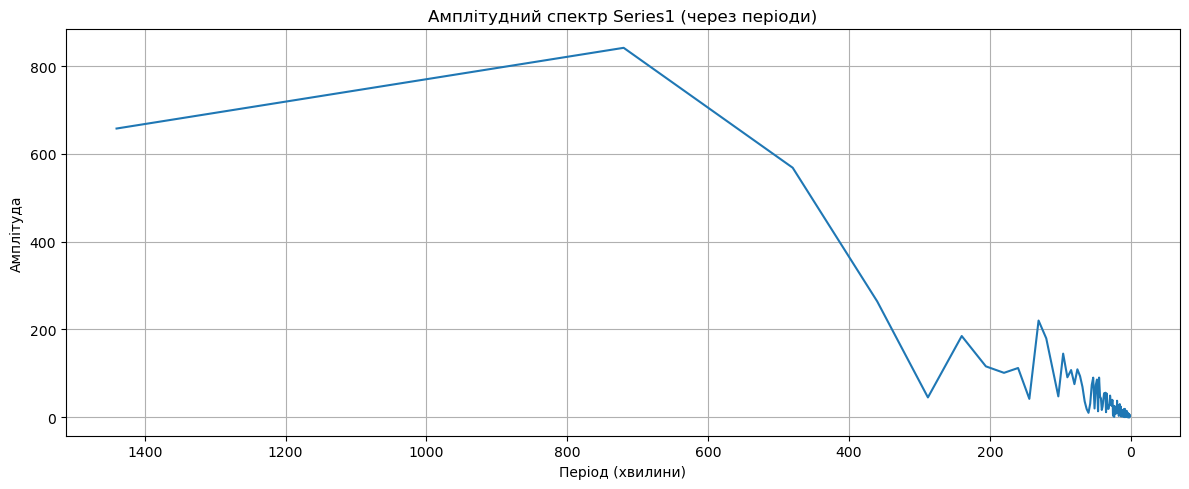

Період: 130.91 хвилин -> Амплітуда: 220.33
Період: 360.00 хвилин -> Амплітуда: 263.95
Період: 480.00 хвилин -> Амплітуда: 568.42
Період: 1440.00 хвилин -> Амплітуда: 657.71
Період: 720.00 хвилин -> Амплітуда: 841.55


In [49]:
# Останні 24 години
N = 1440
dT = 60  # крок 1 хвилина = 60 секунд

name = 'Series1'

signal = df_int[name].iloc[-N:].values

# FFT
fft_coeffs = np.fft.fft(signal)
amplitudes = np.abs(fft_coeffs)
freqs = np.fft.fftfreq(N, d=dT)

# Тільки перша половина (позитивні частоти)
half_N = N // 2
freqs = freqs[:half_N]
amplitudes = amplitudes[:half_N]

# Обчислюємо періоди у хвилинах
periods_min = 1 / freqs / 60  # (секунди -> хвилини)

# Щоб уникнути ділення на 0 (freq=0), фільтруємо частоти > 0
mask = freqs > 0
periods_min = periods_min[mask]
amplitudes = amplitudes[mask]

# Графік: амплітуда vs період
plt.figure(figsize=(12, 5))
plt.plot(periods_min, amplitudes)
plt.xlabel('Період (хвилини)')
plt.ylabel('Амплітуда')
plt.title(f'Амплітудний спектр {name} (через періоди)')
plt.grid(True)
plt.tight_layout()
plt.gca().invert_xaxis()  # Інвертуємо ось X, щоб великі періоди були ліворуч
plt.show()

# Знаходимо найбільші амплітуди
top_indices = np.argsort(amplitudes)[-5:]  # топ-5 найбільших
for idx in top_indices:
    print(f"Період: {periods_min[idx]:.2f} хвилин -> Амплітуда: {amplitudes[idx]:.2f}")

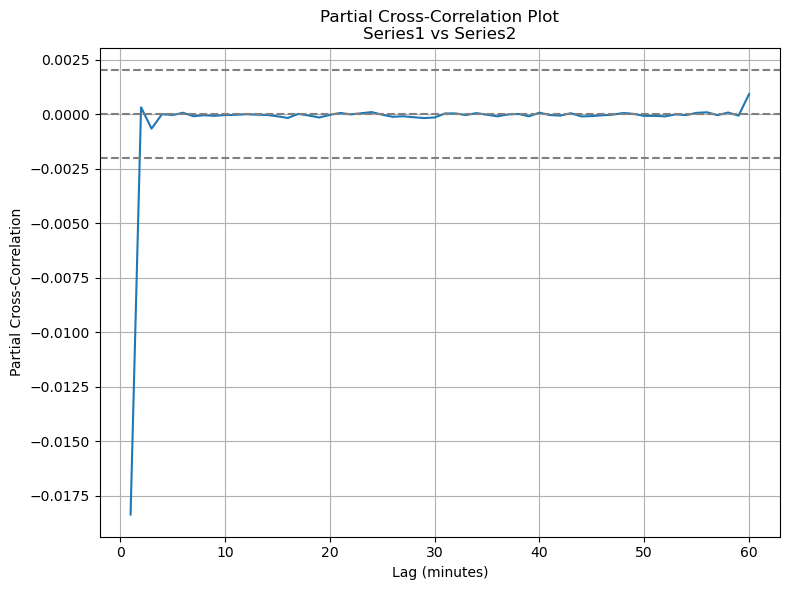

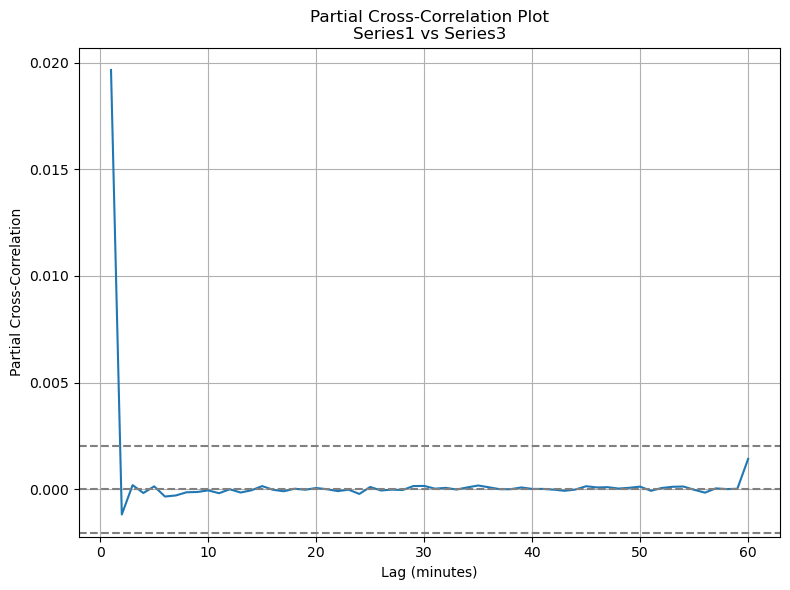

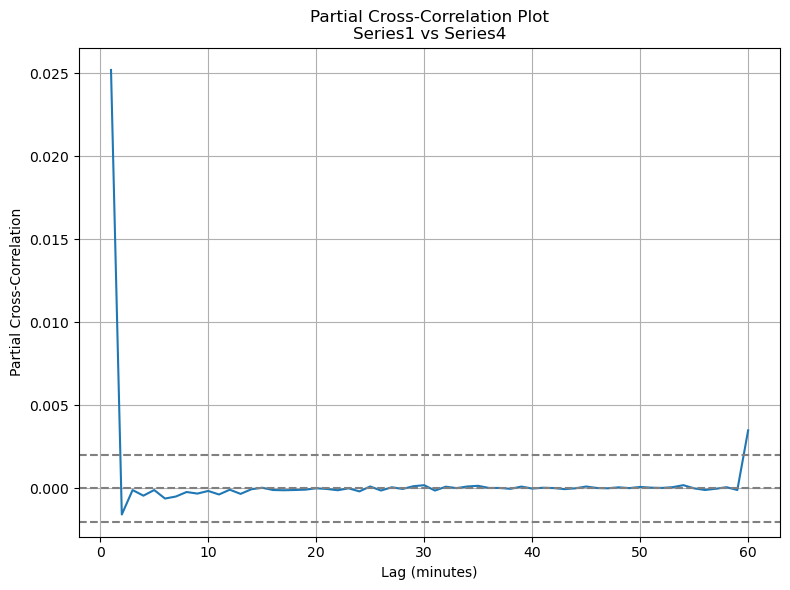

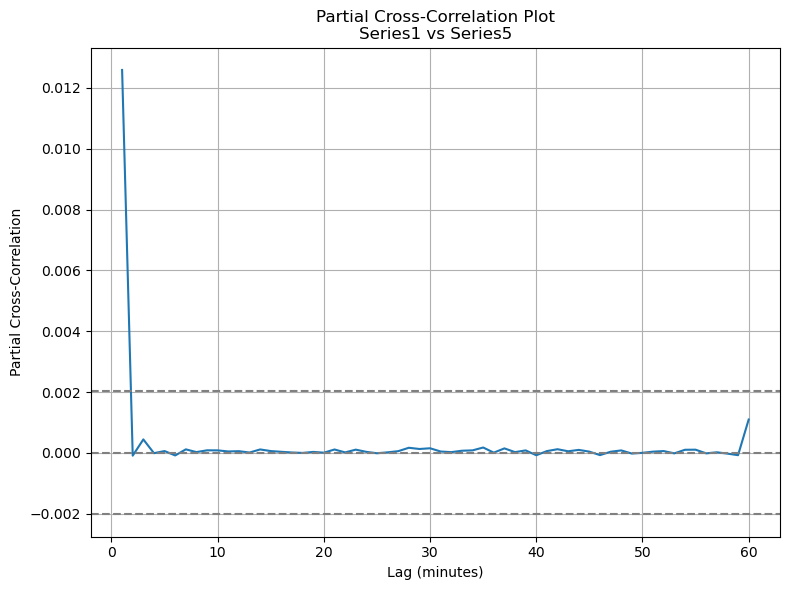

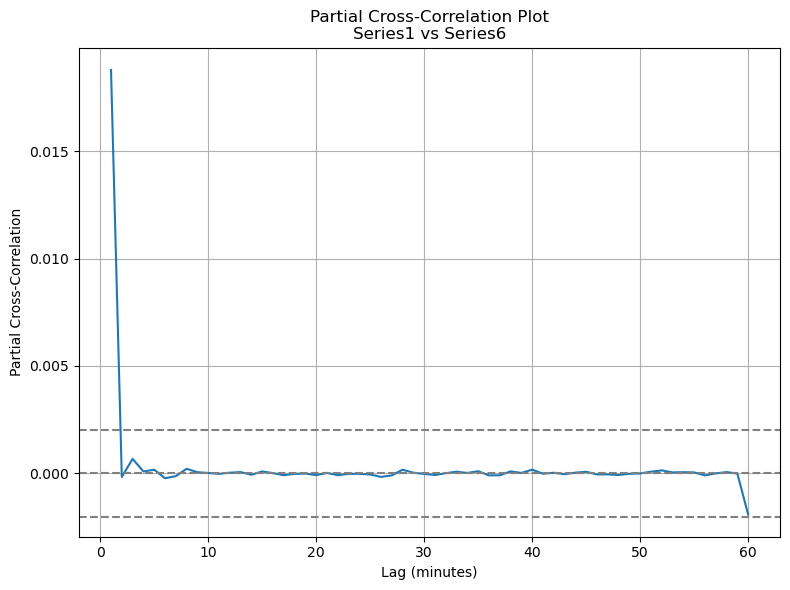

In [54]:
# Налаштування
nlags = 60  # максимальна кількість лагів
target_series = df_int['Series1'].dropna().values

for i in range(2, 7):  # Series2, Series3, ..., Series6
    lagged_series = df_int[f'Series{i}'].dropna().values
    
    # Укорочуємо ряди щоб вони збігалися за довжиною
    min_len = min(len(target_series), len(lagged_series))
    target_aligned = target_series[-min_len:]
    lagged_aligned = lagged_series[-min_len:]

    # Створюємо лагову матрицю
    X = np.column_stack([
        np.roll(lagged_aligned, lag) for lag in range(1, nlags + 1)
    ])
    X = X[nlags:]  # прибираємо початкові NaN через скручування
    y = target_aligned[nlags:]

    pacf_values = []

    # Часткова кореляція: OLS-регресія
    for lag in range(nlags):
        # Лагована змінна
        x_lag = X[:, lag]

        # Побудуємо допоміжну регресію для видалення впливу інших лагів
        other_lags = np.delete(X, lag, axis=1)
        
        # Регресія x_lag на всі інші лаги
        beta_x = np.linalg.lstsq(other_lags, x_lag, rcond=None)[0]
        residuals_x = x_lag - other_lags @ beta_x

        # Регресія y на всі інші лаги
        beta_y = np.linalg.lstsq(other_lags, y, rcond=None)[0]
        residuals_y = y - other_lags @ beta_y

        # Кореляція між залишками
        corr = np.corrcoef(residuals_x, residuals_y)[0, 1]
        pacf_values.append(corr)

    pacf_values = np.array(pacf_values)

    # Графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, nlags + 1), pacf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(y) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(y) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Partial Cross-Correlation Plot\nSeries1 vs Series{i}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Partial Cross-Correlation")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

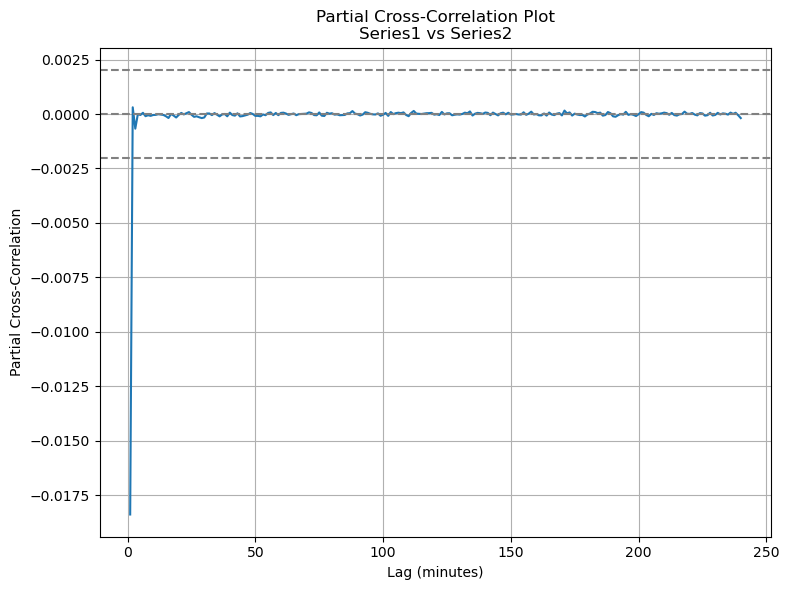

KeyboardInterrupt: 

In [55]:
# Налаштування
nlags = 240  # максимальна кількість лагів
target_series = df_int['Series1'].dropna().values

for i in range(2, 7):  # Series2, Series3, ..., Series6
    lagged_series = df_int[f'Series{i}'].dropna().values
    
    # Укорочуємо ряди щоб вони збігалися за довжиною
    min_len = min(len(target_series), len(lagged_series))
    target_aligned = target_series[-min_len:]
    lagged_aligned = lagged_series[-min_len:]

    # Створюємо лагову матрицю
    X = np.column_stack([
        np.roll(lagged_aligned, lag) for lag in range(1, nlags + 1)
    ])
    X = X[nlags:]  # прибираємо початкові NaN через скручування
    y = target_aligned[nlags:]

    pacf_values = []

    # Часткова кореляція: OLS-регресія
    for lag in range(nlags):
        # Лагована змінна
        x_lag = X[:, lag]

        # Побудуємо допоміжну регресію для видалення впливу інших лагів
        other_lags = np.delete(X, lag, axis=1)
        
        # Регресія x_lag на всі інші лаги
        beta_x = np.linalg.lstsq(other_lags, x_lag, rcond=None)[0]
        residuals_x = x_lag - other_lags @ beta_x

        # Регресія y на всі інші лаги
        beta_y = np.linalg.lstsq(other_lags, y, rcond=None)[0]
        residuals_y = y - other_lags @ beta_y

        # Кореляція між залишками
        corr = np.corrcoef(residuals_x, residuals_y)[0, 1]
        pacf_values.append(corr)

    pacf_values = np.array(pacf_values)

    # Графік
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, nlags + 1), pacf_values)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=1.96 / (len(y) ** 0.5), linestyle='--', color='gray')
    plt.axhline(y=-1.96 / (len(y) ** 0.5), linestyle='--', color='gray')
    plt.title(f"Partial Cross-Correlation Plot\nSeries1 vs Series{i}")
    plt.xlabel("Lag (minutes)")
    plt.ylabel("Partial Cross-Correlation")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Axes: >

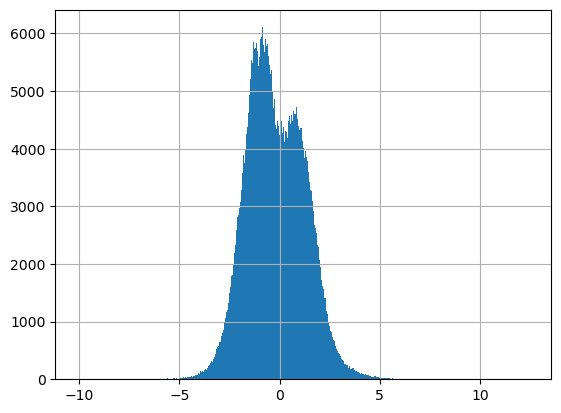

In [70]:
df_int['Series6'].hist(bins=1000)

In [19]:
for i, column in enumerate(df_int.columns):
    print(f'Series{i}:')
    result = adfuller(df_int[column][-100000:])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Series0:
ADF Statistic: -10.073410
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series1:
ADF Statistic: -9.710147
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series2:
ADF Statistic: -9.927276
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series3:
ADF Statistic: -11.038461
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series4:
ADF Statistic: -11.627842
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series5:
ADF Statistic: -10.843713
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


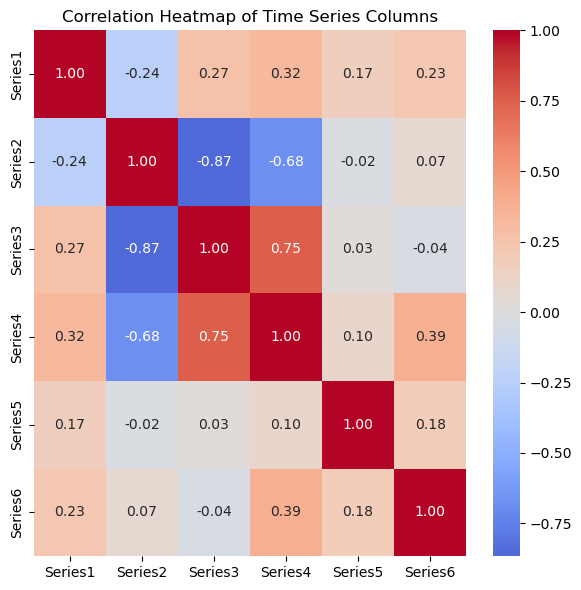

In [17]:
# Calculate correlation matrix
correlation_matrix = df_int.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Time Series Columns")
plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_int['Series1'], model='additive', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2012-01-01 00:00:00    0.458882
2012-01-01 00:01:00    0.398794
2012-01-01 00:02:00    0.480416
2012-01-01 00:03:00    0.319643
2012-01-01 00:04:00    0.361104
                         ...   
2013-10-13 15:27:00   -0.763961
2013-10-13 15:28:00   -0.929016
2013-10-13 15:29:00   -1.058803
2013-10-13 15:30:00   -0.996506
2013-10-13 15:31:00   -0.921254
Name: trend, Length: 938372, dtype: float64
Date
2012-01-01 00:00:00    0.0
2012-01-01 00:01:00    0.0
2012-01-01 00:02:00    0.0
2012-01-01 00:03:00    0.0
2012-01-01 00:04:00    0.0
                      ... 
2013-10-13 15:27:00    0.0
2013-10-13 15:28:00    0.0
2013-10-13 15:29:00    0.0
2013-10-13 15:30:00    0.0
2013-10-13 15:31:00    0.0
Name: seasonal, Length: 938372, dtype: float64
Date
2012-01-01 00:00:00    0.0
2012-01-01 00:01:00    0.0
2012-01-01 00:02:00    0.0
2012-01-01 00:03:00    0.0
2012-01-01 00:04:00    0.0
                      ... 
2013-10-13 15:27:00    0.0
2013-10-13 15:28:00    0.0
2013-10-13 15:29:00    0.0
20

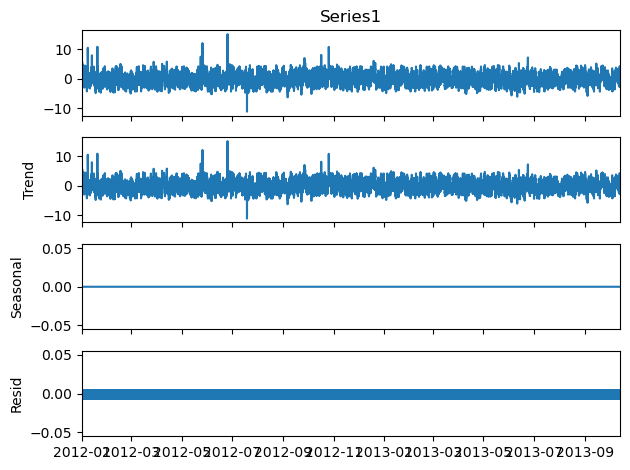

In [21]:
result.plot()
plt.show()

In [28]:
df_int['Series1'].describe()

count    938372.000000
mean         -0.085148
std           1.438158
min         -11.126221
25%          -1.156743
50%          -0.166918
75%           0.975535
max          15.039277
Name: Series1, dtype: float64

In [16]:
from sklearn.mixture import GaussianMixture

def train_gmm_for_series(series, n_components=2, **kwargs):
    """
    Обучает GMM-модель на одном временном ряде.
    series: pandas.Series или 1D numpy.ndarray с данными.
    n_components: число компонент смеси (кластеров).
    **kwargs: дополнительные параметры для GaussianMixture (например, random_state).
    Возврат: обученная модель GaussianMixture.
    """
    # Преобразуем ряд в формат numpy.ndarray и обеспечиваем форму (n_samples, 1)
    data = series.values.reshape(-1, 1) if hasattr(series, 'values') else np.asarray(series).reshape(-1, 1)
    gmm = GaussianMixture(n_components=n_components, **kwargs)
    gmm.fit(data)  # Обучение модели на данных
    return gmm

def train_gmm_for_all_series(dataframe, n_components=2, **kwargs):
    """
    Обучает одну GMM-модель на всех сериях одновременно (многомерные данные).
    dataframe: pandas.DataFrame (или 2D numpy.ndarray) с формой (n_samples, 6).
    n_components: число компонент смеси (кластеров).
    **kwargs: дополнительные параметры для GaussianMixture.
    Возврат: обученная модель GaussianMixture.
    """
    data = dataframe.values if hasattr(dataframe, 'values') else np.asarray(dataframe)
    gmm = GaussianMixture(n_components=n_components, **kwargs)
    gmm.fit(data)
    return gmm

In [17]:
def plot_series_histogram(series, gmm_model, bins=50):
    """
    Строит гистограмму значений серии, раскрашенную по кластерам GMM.
    series: pandas.Series или 1D numpy.ndarray с данными серии.
    gmm_model: обученная GaussianMixture модель для этой серии.
    bins: количество бинов (столбцов) гистограммы.
    """
    data = series.values if hasattr(series, 'values') else np.asarray(series)
    labels = gmm_model.predict(data.reshape(-1, 1))  # Кластерные метки для каждого значения
    # Разделяем значения по кластерам:
    cluster0 = data[labels == 0]
    cluster1 = data[labels == 1]
    # Строим наложенные гистограммы для каждого кластера
    plt.figure(figsize=(8, 4))
    plt.hist([cluster0, cluster1], bins=bins, density=False, 
             color=['#4c72b0', '#dd8452'], alpha=0.7, label=['Кластер 0', 'Кластер 1'])
    plt.title('Распределение значений {} по кластерам GMM'.format(getattr(series, 'name', 'Series')))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

def plot_cluster_scatter(dataframe, gmm_model, col_x=0, col_y=1):
    """
    Строит scatter-диаграмму для двух признаков из многомерных данных с раскраской по кластерам.
    dataframe: pandas.DataFrame (или 2D numpy.ndarray) с данными (как минимум 2 столбца).
    gmm_model: обученная GaussianMixture модель на этих данных.
    col_x: название или индекс столбца для оси X.
    col_y: название или индекс столбца для оси Y.
    """
    # Получаем массив данных и метки кластеров для каждого наблюдения:
    data = dataframe.values if hasattr(dataframe, 'values') else np.asarray(dataframe)
    labels = gmm_model.predict(data)
    # Определяем координаты X и Y для точек (по указанным столбцам):
    if hasattr(dataframe, 'values'):
        # Если передан DataFrame, поддерживаем выбор по имени столбца или индексу
        x = dataframe[col_x].values if isinstance(col_x, str) else data[:, col_x]
        y = dataframe[col_y].values if isinstance(col_y, str) else data[:, col_y]
        x_label = col_x if isinstance(col_x, str) else dataframe.columns[col_x]
        y_label = col_y if isinstance(col_y, str) else dataframe.columns[col_y]
    else:
        # Если передан просто numpy.ndarray
        x = data[:, col_x]
        y = data[:, col_y]
        x_label = f"Feature {col_x}"
        y_label = f"Feature {col_y}"
    # Строим разброс точек, цвет – по кластеру
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.5)
    plt.title('Диаграмма рассеяния по признакам (кластеры GMM)')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [19]:
import joblib

def save_gmm_model(gmm_model, filename):
    """
    Сохраняет объект GaussianMixture в файл с помощью joblib.
    filename: путь к файлу для сохранения (например, 'model.joblib').
    """
    joblib.dump(gmm_model, filename)

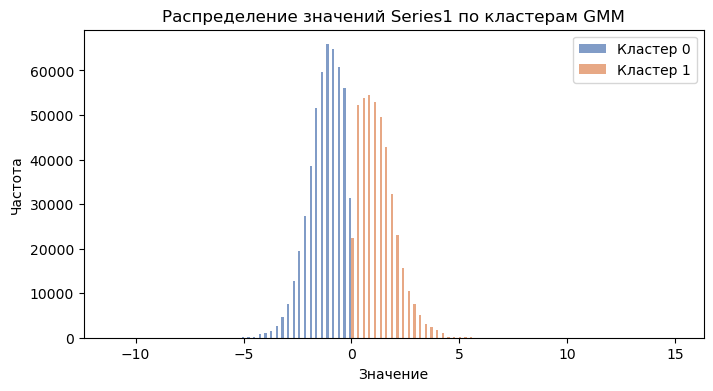

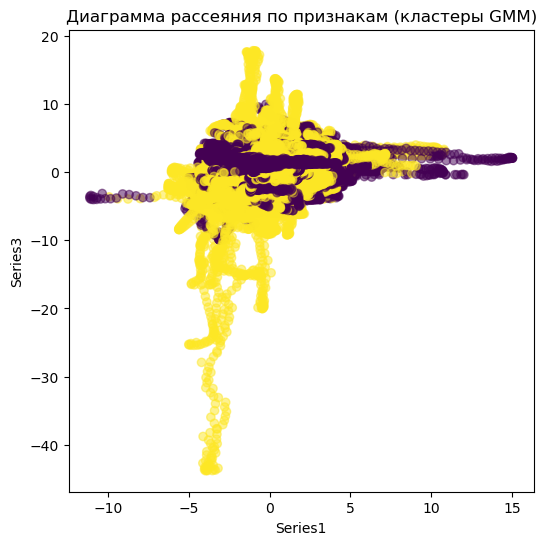

In [21]:
# Предполагается, что данные загружены в DataFrame df с колонками Series1..Series6 и datetime-индексом.
# Обучаем отдельные модели для каждой серии:
gmm_models = {}
for col in df_int.columns:
    gmm_models[col] = train_gmm_for_series(df_int[col], n_components=2, random_state=0)

# Обучаем общую модель на всех сериях сразу:
gmm_combined = train_gmm_for_all_series(df_int, n_components=2, random_state=0)

# Строим гистограммы для каждой серии (пример для Series1):
plot_series_histogram(df_int['Series1'], gmm_models['Series1'], bins=100)

# Строим scatter-диаграмму для общих кластеров (пример по Series1 и Series2):
plot_cluster_scatter(df_int, gmm_combined, col_x='Series1', col_y='Series3')

# Сохраняем модели на диск:
for name, model in gmm_models.items():
    save_gmm_model(model, f"{name}_gmm.joblib")
# Сохраняем и общую модель:
save_gmm_model(gmm_combined, "combined_gmm.joblib")

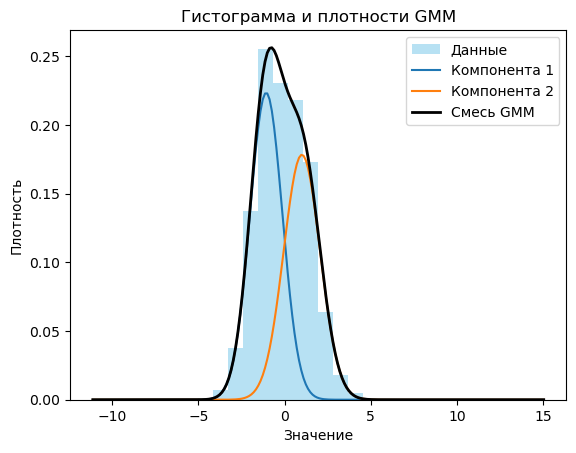

In [24]:
from scipy.stats import norm

def plot_histogram_with_gmm(data, n_components=2):
    """
    Строит гистограмму данных с наложенными плотностями компонентов GMM 
    и общей смесью плотностей. Возвращает обученную модель GaussianMixture.
    """
    data = np.asarray(data)
    # Обучение GMM на данных (предполагается одномерный ряд)
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data.reshape(-1, 1))
    # Параметры GMM: веса, средние и дисперсии компонентов
    weights = gmm.weights_                        # веса компонентов
    means = gmm.means_.flatten()                  # средние (mu) компонентов
    # Извлекаем дисперсии (covariances_) для каждой компоненты
    if gmm.covariance_type == 'full':
        variances = [cov[0][0] for cov in gmm.covariances_]
    elif gmm.covariance_type == 'diag':
        variances = gmm.covariances_.flatten()
    elif gmm.covariance_type == 'tied':
        # одна общая ковариация для всех компонентов
        variances = [gmm.covariances_[0, 0]] * n_components
    elif gmm.covariance_type == 'spherical':
        variances = gmm.covariances_.flatten()
    else:
        variances = [cov[0][0] for cov in gmm.covariances_]
    stds = np.sqrt(variances)                     # стандартые отклонения sigma
    
    # Задаём диапазон значений для рисования плотностей (чуть шире мин/макс данных)
    xmin, xmax = data.min(), data.max()
    x_vals = np.linspace(xmin, xmax, 200)
    
    # Строим гистограмму исходных данных
    fig, ax = plt.subplots()
    ax.hist(data, bins=30, density=True, color='skyblue', alpha=0.6, label='Данные')
    # Строим плотности каждой компоненты и суммарную плотность GMM
    if len(weights) == 1:
        # Если компонент всего одна, рисуем только её плотность
        pdf = weights[0] * norm.pdf(x_vals, loc=means[0], scale=stds[0])
        ax.plot(x_vals, pdf, color='black', lw=2, label='Нормальное распределение')
    else:
        pdf_sum = np.zeros_like(x_vals)
        for i, (w, m, s) in enumerate(zip(weights, means, stds)):
            pdf_comp = w * norm.pdf(x_vals, loc=m, scale=s)
            pdf_sum += pdf_comp
            ax.plot(x_vals, pdf_comp, lw=1.5, label=f'Компонента {i+1}')
        ax.plot(x_vals, pdf_sum, color='black', lw=2, label='Смесь GMM')
    # Оформляем график
    ax.set_title("Гистограмма и плотности GMM")
    ax.set_xlabel("Значение")
    ax.set_ylabel("Плотность")
    ax.legend()
    plt.show()
    return gmm

# Пример использования на данных `series` (Pandas Series или массив NumPy):
X = df_int['Series1'].dropna().values  # преобразуем ряд в numpy-массив, исключив NaN
gmm_model = plot_histogram_with_gmm(X, n_components=2)

In [25]:
def print_aic_bic(data, n_components):
    """
    Обучает GMM с заданным числом компонент и печатает значения AIC и BIC.
    """
    data = np.asarray(data)
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data.reshape(-1, 1))
    aic_val = gmm.aic(data.reshape(-1, 1))
    bic_val = gmm.bic(data.reshape(-1, 1))
    print(f"{n_components}-компонентный GMM: AIC = {aic_val:.2f}, BIC = {bic_val:.2f}")
    return gmm

# Вычисляем AIC и BIC для 1-компонентной (одна Gaussian) и 2-компонентной модели:
X = np.asarray(X)  # убеждаемся, что данные в numpy-массиве
gmm1 = print_aic_bic(X, 1)   # однокомпонентная модель
gmm2 = print_aic_bic(X, 2)   # двухкомпонентная модель

1-компонентный GMM: AIC = 3344926.53, BIC = 3344950.04
2-компонентный GMM: AIC = 3333945.83, BIC = 3334004.59


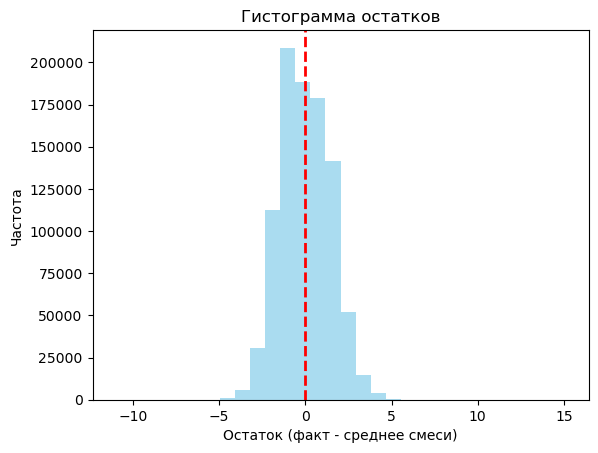

Среднее значение остатков: -2.7253913046029093e-14


In [26]:
def plot_residuals(data, gmm_model):
    """
    Строит гистограмму остатков: разности между фактическими значениями 
    и математическим ожиданием (средним) смеси GMM.
    """
    data = np.asarray(data)
    # Вычисляем математическое ожидание смеси GMM
    mixture_mean = np.dot(gmm_model.weights_, gmm_model.means_.flatten())
    residuals = data.flatten() - mixture_mean
    # Строим гистограмму остатков
    fig, ax = plt.subplots()
    ax.hist(residuals, bins=30, color='skyblue', alpha=0.7)
    # Вертикальная линия в нуле
    ax.axvline(0, color='red', linestyle='--', linewidth=2)
    # Подписи осей и заголовок
    ax.set_title("Гистограмма остатков")
    ax.set_xlabel("Остаток (факт - среднее смеси)")
    ax.set_ylabel("Частота")
    plt.show()
    # Также выведем среднее остатков для проверки
    print("Среднее значение остатков:", residuals.mean())
    return residuals

# Построение графика остатков для ранее обученного 2-компонентного GMM
residuals = plot_residuals(X, gmm2)

In [17]:
import pickle

In [18]:
try:
    with open('gmm_model.pkl', 'rb') as f:
        gmm = pickle.load(f)
except FileNotFoundError:
    # Если предварительн+о обученной модели нет, обучим новую GMM на основе тренировочных данных.
    # Здесь мы обучаем на всех точках 6 временных рядов (можно использовать только train, чтобы избежать leakage).
    gmm = GaussianMixture(n_components=2, random_state=0)
    # Обучаем GMM на значениях шести рядов (каждая строка - вектор из 6 значений в момент времени)
    gmm.fit(df_int[['Series1','Series2','Series3','Series4','Series5','Series6']].dropna())
    # Сохраним обученную GMM для повторного использования
    with open('gmm_model.pkl', 'wb') as f_out:
        pickle.dump(gmm, f_out)

In [19]:
# Рассчитываем вероятности принадлежности каждой точки к двум режимам:
if not df_int.empty:
    regime_probs = gmm.predict_proba(df_int[['Series1','Series2','Series3','Series4','Series5','Series6']].fillna(0))
    # Добавляем новые колонки с вероятностями режимов
    df_int['p_regime0'] = regime_probs[:, 0]
    df_int['p_regime1'] = regime_probs[:, 1]
else:
    # Если DataFrame пуст (например, демонстрационный код), создадим эти столбцы без данных
    df_int['p_regime0'] = []
    df_int['p_regime1'] = []

# 3.2. Сезонные признаки через синус и косинус для периодов 360, 480, 720 и 1440 минут.
# Периоды:
periods = [360, 480, 720, 1440]  # 360 мин = 6 часов, 480 мин = 8 часов, 720 мин = 12 часов, 1440 мин = 24 часа.
# Создаем индекс времени в минутах для каждой записи, если его нет (0,1,2,...)
if 'time_index' in df_int.columns:
    df_int.drop('time_index', axis=1, inplace=True)
df_int['time_index'] = np.arange(len(df_int))
# Используем синус и косинус для представления цикличных сезонных паттернов по заданным периодам.
for T in periods:
    df_int[f'sin_{T}'] = np.sin(2 * np.pi * df_int['time_index'] / T)
    df_int[f'cos_{T}'] = np.cos(2 * np.pi * df_int['time_index'] / T)

# Примечание: Мы используем только синус/косинус для сезонности, без добавления лаговых признаков, согласно условию.

In [20]:
df_int = df_int.drop(['time_index'], axis=1)

In [21]:
df_int.head()

,Series1,Series2,Series3,Series4,Series5,Series6,p_regime0,p_regime1,sin_360,cos_360,sin_480,cos_480,sin_720,cos_720,sin_1440,cos_1440
Date,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,0.458882,-1.358177,1.893863,1.022005,-1.810638,-0.792524,0.407386,0.592614,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2012-01-01 00:01:00,0.398794,-1.356111,2.011162,1.104435,-1.807173,-0.726880,0.211156,0.788844,0.017452,0.999848,0.013090,0.999914,0.008727,0.999962,0.004363,0.999990
2012-01-01 00:02:00,0.480416,-1.354050,2.116713,1.134004,-1.803721,-0.816924,0.108858,0.891142,0.034899,0.999391,0.026177,0.999657,0.017452,0.999848,0.008727,0.999962
2012-01-01 00:03:00,0.319643,-1.351994,1.987292,0.996250,-1.800283,-1.010524,0.311460,0.688540,0.052336,0.998630,0.039260,0.999229,0.026177,0.999657,0.013090,0.999914
2012-01-01 00:04:00,0.361104,-1.349943,2.059825,1.041442,-1.796859,-1.115188,0.245610,0.754390,0.069756,0.997564,0.052336,0.998630,0.034899,0.999391,0.017452,0.999848


In [22]:
# Предполагается, что исходный DataFrame `df` уже загружен и содержит индекс datetime (с шагом 1 минута)
# и колонки Series1..Series6, p_regime0, p_regime1, sin_360, cos_360, sin_480, cos_480, sin_720, cos_720, sin_1440, cos_1440.

# Разделение на обучающую, валидационную и тестовую выборки (70%/15%/15%) по времени без перемешивания
n = len(df_int)
train_end = int(n * 0.70)
val_end = int(n * 0.85)  # 70% + 15% = 85%

train_df = df_int.iloc[:train_end]
val_df = df_int.iloc[train_end:val_end]
test_df = df_int.iloc[val_end:]

# Выводим размеры выборок для проверки
print("Train samples:", len(train_df), "Val samples:", len(val_df), "Test samples:", len(test_df))

Train samples: 656860 Val samples: 140756 Test samples: 140756
